In [262]:
!pip install --user snowflake-connector-python


In [301]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Establish connection
conn = snowflake.connector.connect(
          user='aadishmn',
            password='Qwert@123',
            account='tz70231.central-india.azure',
            warehouse='COMPUTE_WH',
            database='JMAN',
            schema='JMAN_SCHEMA',
            role='ACCOUNTADMIN'
)

cur = conn.cursor()

cur.execute(f'SELECT * FROM JMAN.JMAN_SCHEMA_MART.FINAL_TABLE')

# Fetch the results
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()

# Convert the result into a pandas DataFrame for easier manipulation
dataset = pd.DataFrame(rows, columns=[x[0] for x in cur.description])

In [264]:
dataset = pd.DataFrame(rows, columns=[x[0] for x in cur.description])

In [265]:
dataset.to_csv('src_data.csv', index=False)
df=dataset.copy()

In [266]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,HOURS_OVER_OR_UNDER,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS
0,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
1,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
2,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
3,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
4,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,"VonRueden, Bartell and Halvorson",Software_Developper,...,15.0,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59449,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,-3.0,None,None,None,None,None,None,None,None,None
59450,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,-3.0,None,None,None,None,None,None,None,None,None
59451,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,-3.0,None,None,None,None,None,None,None,None,None
59452,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,-3.0,None,None,None,None,None,None,None,None,None


In [267]:
threshold_hours = 35

# Create 'ATTENDANCE_REGULARIZATION' feature based on total weekly hours
df['ATTENDANCE_REGULARIZATION'] = (df['TOTAL_WEEK_HOURS'] < threshold_hours).astype(int)


In [268]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS,ATTENDANCE_REGULARIZATION
0,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
1,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
2,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,Crist-Wiegand,Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
3,Alli,Adamowitz,aadamowitz16@hud.gov,Female,10-02-1984,User,intern,40,"VonRueden, Bartell and Halvorson",Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
4,Alli,Adamowitz,aadamowitz16@hud.gov,Female,02-07-1994,User,intern,30,"VonRueden, Bartell and Halvorson",Software_Developper,...,2024-02-01,2024-02-08,3,4,4,1,2,3,Struggling to cope with changing project requi...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59449,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,None,None,None,None,None,None,None,None,None,0
59450,Zed,Hardway,zhardwayld@un.org,Female,29-03-1999,User,intern,25,Strosin Inc,Consulting,...,None,None,None,None,None,None,None,None,None,0
59451,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,None,None,None,None,None,None,None,None,None,0
59452,Zed,Hardway,zhardwayld@un.org,Female,15-10-1995,User,intern,29,Leannon-Grimes,Software_Developper,...,None,None,None,None,None,None,None,None,None,0


In [269]:
# Ensure 'ATTENDANCE_REGULARIZATION' is numerical
df['ATTENDANCE_REGULARIZATION'] = pd.to_numeric(df['ATTENDANCE_REGULARIZATION'], errors='coerce')

# Sample 500 rows for each value of 'ATTENDANCE_REGULARIZATION'
df_positive = df[df['ATTENDANCE_REGULARIZATION'] == 1].sample(n=2500, random_state=42)
df_negative = df[df['ATTENDANCE_REGULARIZATION'] == 0].sample(n=2500, random_state=42)

df_sampled = pd.concat([df_positive, df_negative])

df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the distribution of 'ATTENDANCE_REGULARIZATION'
print(df_sampled['ATTENDANCE_REGULARIZATION'].value_counts())

df_sampled.to_csv('new_src_data.csv', index=False)


ATTENDANCE_REGULARIZATION
1    2500
0    2500
Name: count, dtype: int64


In [270]:
file_path = 'new_src_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was read correctly
print(df.head())


  FIRST_NAME LAST_NAME                           EMAIL  GENDER DOB_DD_MM_YYYY  \
0      Nanon   Spowage     nspowagef9@sciencedaily.com    Male     17-03-1987   
1     Prince   Nazaret  pnazaretj4@acquirethisname.com    Male     03-03-2001   
2   Anatollo   Le-Good              alegoodde@about.me  Female     12-11-1983   
3      Honey  Kowalski     hkowalskirc@cyberchimps.com    Male     15-04-1990   
4     Prince   Nazaret  pnazaretj4@acquirethisname.com    Male     03-03-2001   

  USER_TYPE                 ROLE  AGE                   CLIENT_NAME  \
0      User  software_developper   37            Langworth and Sons   
1      User               intern   23                  Nolan-Muller   
2      User  software_developper   41             Franecki-Kassulke   
3      User         tribe_master   34  Bergstrom, Kris and Hartmann   
4      User               intern   23                  Nolan-Muller   

          PROJECT_NAME  ... FEEDBACK_START_PERIOD FEEDBACK_END_PERIOD   Q1  \
0  Softw

In [271]:
df = df.drop_duplicates()

df


,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS,ATTENDANCE_REGULARIZATION
0,Nanon,Spowage,nspowagef9@sciencedaily.com,Male,17-03-1987,User,software_developper,37,Langworth and Sons,Software_Developper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Prince,Nazaret,pnazaretj4@acquirethisname.com,Male,03-03-2001,User,intern,23,Nolan-Muller,Consulting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Anatollo,Le-Good,alegoodde@about.me,Female,12-11-1983,User,software_developper,41,Franecki-Kassulke,Consulting,...,2023-10-29,2023-11-05,4.0,3.0,1.0,1.0,5.0,5.0,Feeling unrecognized for my contributions.,0
3,Honey,Kowalski,hkowalskirc@cyberchimps.com,Male,15-04-1990,User,tribe_master,34,"Bergstrom, Kris and Hartmann",Consulting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Prince,Nazaret,pnazaretj4@acquirethisname.com,Male,03-03-2001,User,intern,23,Nolan-Muller,Consulting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,Maryl,Balentyne,mbalentyneef@columbia.edu,Female,23-03-1987,User,intern,37,Ferry Group,Software_Developper,...,2023-05-14,2023-05-21,4.0,1.0,3.0,5.0,2.0,1.0,Need support in managing project risks effecti...,0
4992,Brooks,Kuhnke,bkuhnke4v@linkedin.com,Female,25-07-1977,User,consultant,47,Walker-Robel,Software_Developper,...,2023-06-17,2023-06-24,1.0,3.0,3.0,3.0,4.0,3.0,Concerns about the project's adherence to qual...,0
4994,Melonie,Fierman,mfiermand@wordpress.com,Female,02-11-1987,User,consultant,37,Franecki LLC,Software_Developper,...,2023-07-20,2023-07-27,1.0,3.0,3.0,1.0,2.0,2.0,Concerns about the team's responsiveness to cl...,0
4997,Jermayne,Gosswell,jgosswellln@wikipedia.org,Female,04-12-1996,User,consultant,28,Kuhn Group,Software_Developper,...,2023-07-03,2023-07-10,1.0,5.0,4.0,4.0,3.0,2.0,Experiencing difficulties in managing project ...,0


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 0 to 4998
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIRST_NAME                 2517 non-null   object 
 1   LAST_NAME                  2517 non-null   object 
 2   EMAIL                      2517 non-null   object 
 3   GENDER                     2517 non-null   object 
 4   DOB_DD_MM_YYYY             2517 non-null   object 
 5   USER_TYPE                  2517 non-null   object 
 6   ROLE                       2517 non-null   object 
 7   AGE                        2517 non-null   int64  
 8   CLIENT_NAME                2517 non-null   object 
 9   PROJECT_NAME               2517 non-null   object 
 10  PROJECT_START_DATE         2517 non-null   object 
 11  PROJECT_END_DATE           2517 non-null   object 
 12  PROJECT_DURATION           2517 non-null   int64  
 13  PROJECT_CATEGORY           2517 non-null   object 
 1

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns


# Uni-variate Analysis

C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


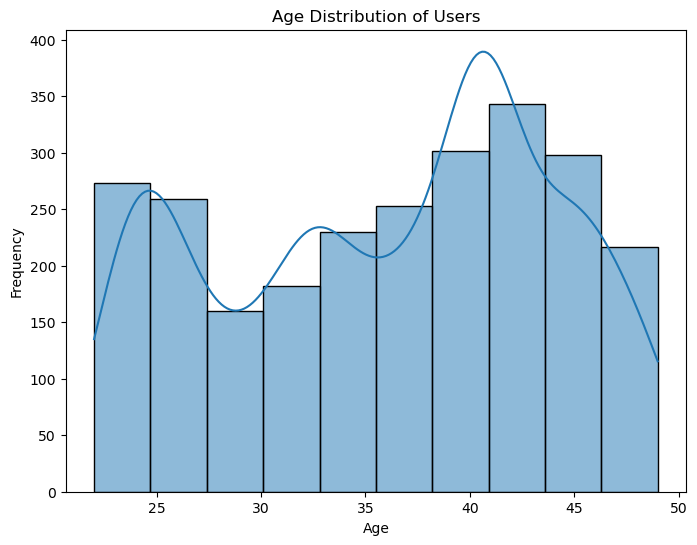

In [274]:
#Count of users based on age groups
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=10, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


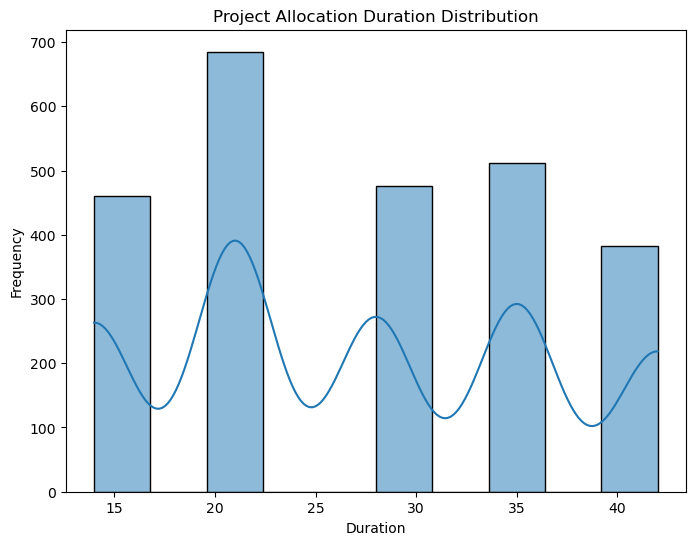

In [275]:
# Plot project allocation duration distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['ALLOCATION_DURATION'].dropna(), bins=10, kde=True)
plt.title('Project Allocation Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='ROLE', data=df)
plt.title('Distribution of Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()


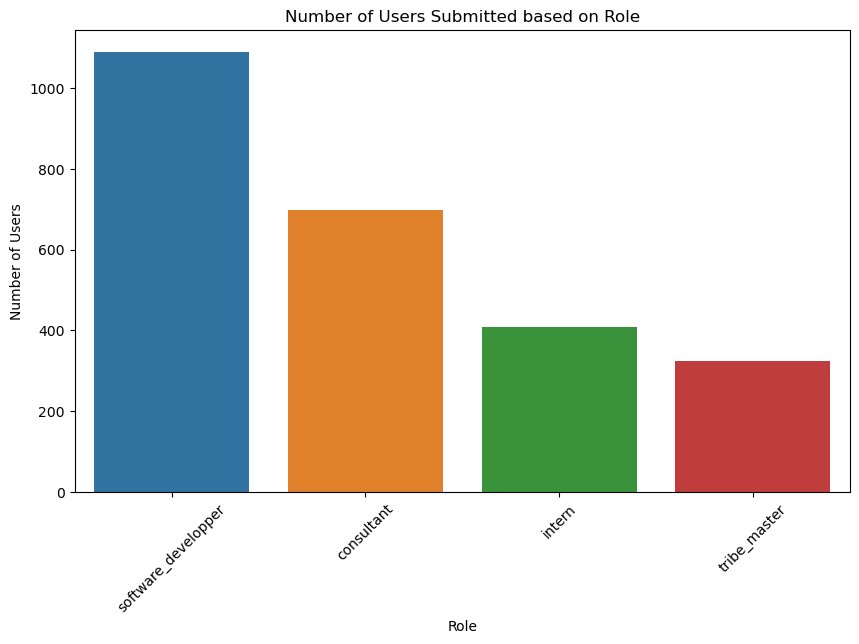

In [276]:
#No of submissions based on the role

role_counts = df['ROLE'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=role_counts.index, y=role_counts.values)
plt.title('Number of Users Submitted based on Role')
plt.xlabel('Role')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


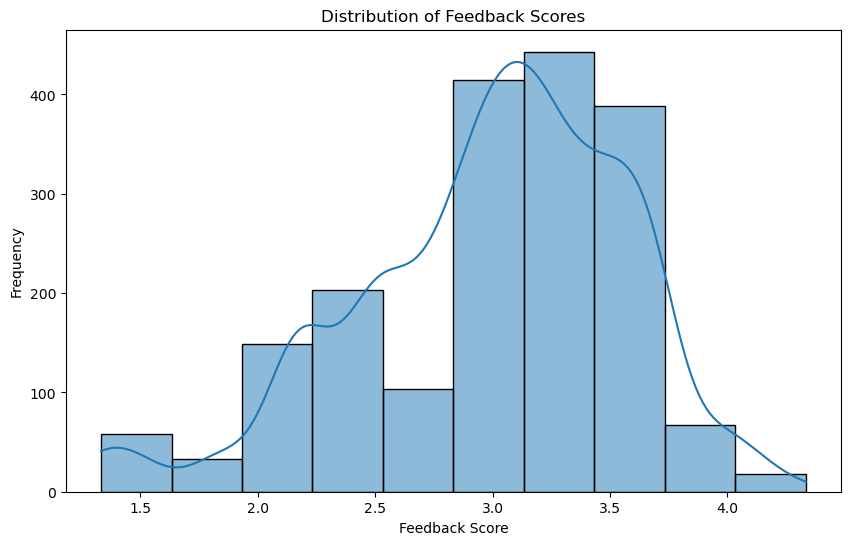

In [277]:
# Calculate overall feedback score
feedback_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
df['FEEDBACK_SCORE'] = df[feedback_columns].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(df['FEEDBACK_SCORE'], bins=10, kde=True)
plt.title('Distribution of Feedback Scores')
plt.xlabel('Feedback Score')
plt.ylabel('Frequency')
plt.show()


# Bi-variate Analysis

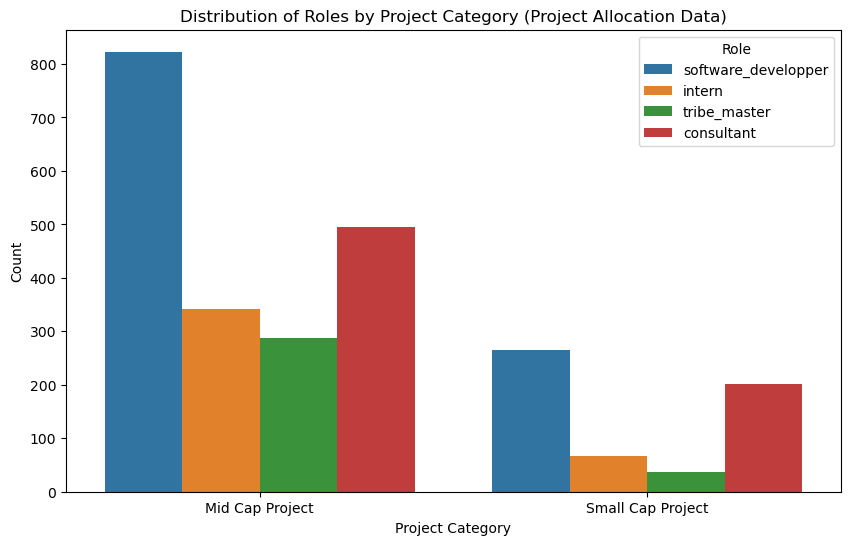

In [278]:
# Roles vs Project category based on the count
plt.figure(figsize=(10, 6))
sns.countplot(x='PROJECT_CATEGORY', hue='ROLE', data=df)
plt.title('Distribution of Roles by Project Category (Project Allocation Data)')
plt.xlabel('Project Category')
plt.ylabel('Count')
plt.legend(title='Role')
plt.show()


C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AadishNagarajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

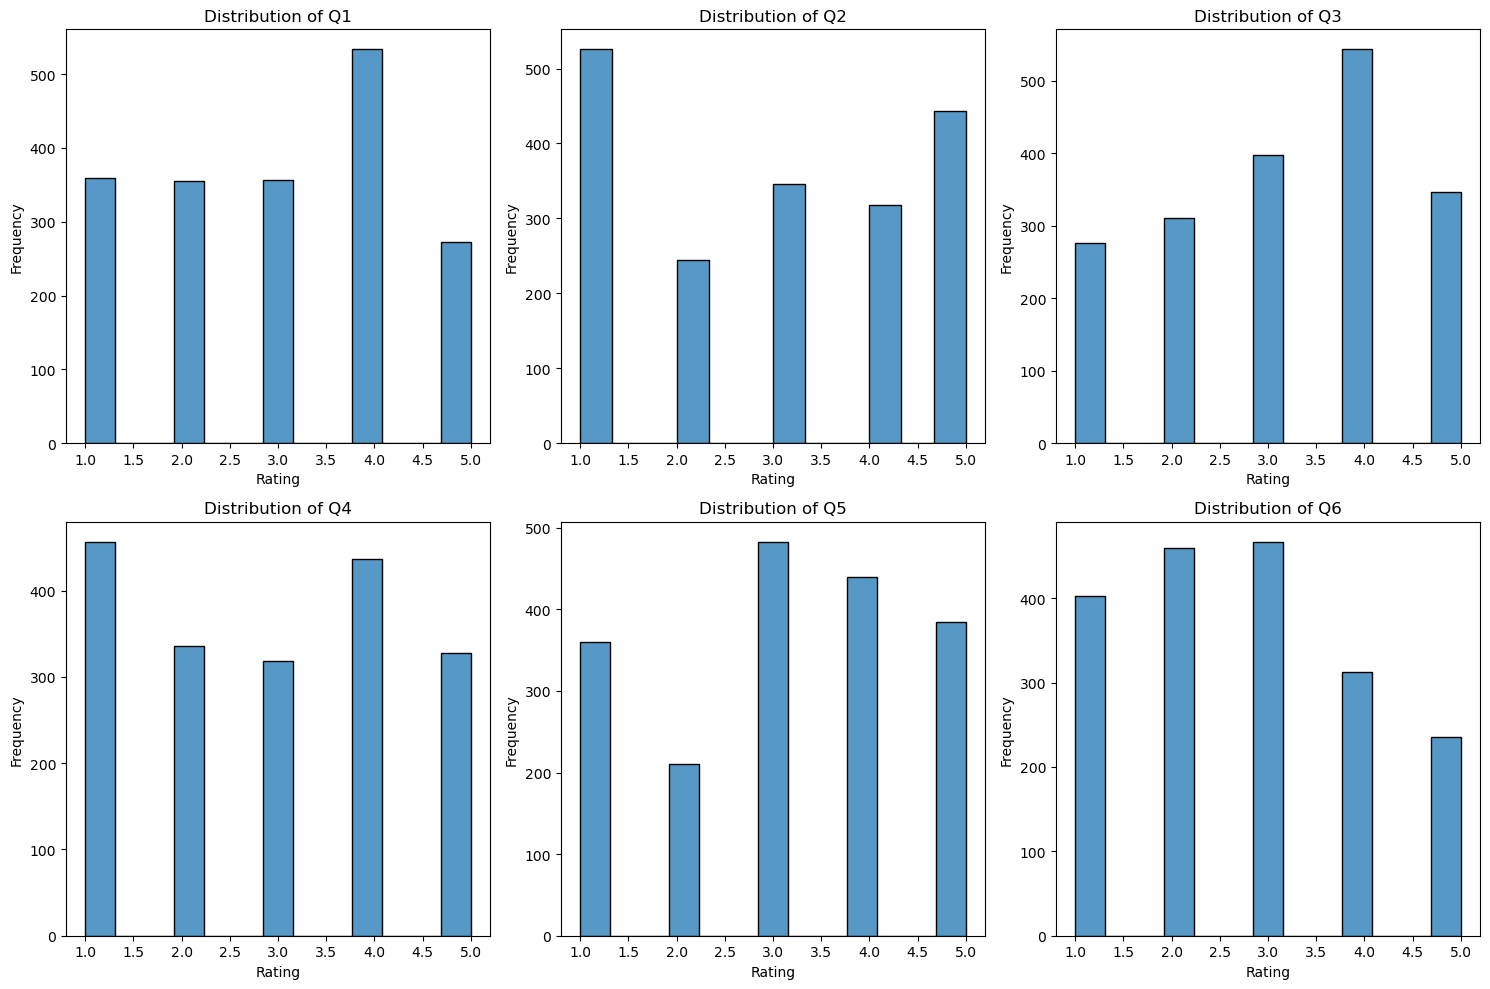

In [279]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
feedback_questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
for i, question in enumerate(feedback_questions):
    sns.histplot(df[question], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {question}')
    axes[i//3, i%3].set_xlabel('Rating')
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [280]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS,ATTENDANCE_REGULARIZATION,FEEDBACK_SCORE
0,Nanon,Spowage,nspowagef9@sciencedaily.com,Male,17-03-1987,User,software_developper,37,Langworth and Sons,Software_Developper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,Prince,Nazaret,pnazaretj4@acquirethisname.com,Male,03-03-2001,User,intern,23,Nolan-Muller,Consulting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,Anatollo,Le-Good,alegoodde@about.me,Female,12-11-1983,User,software_developper,41,Franecki-Kassulke,Consulting,...,2023-11-05,4.0,3.0,1.0,1.0,5.0,5.0,Feeling unrecognized for my contributions.,0,3.166667
3,Honey,Kowalski,hkowalskirc@cyberchimps.com,Male,15-04-1990,User,tribe_master,34,"Bergstrom, Kris and Hartmann",Consulting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Prince,Nazaret,pnazaretj4@acquirethisname.com,Male,03-03-2001,User,intern,23,Nolan-Muller,Consulting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,Maryl,Balentyne,mbalentyneef@columbia.edu,Female,23-03-1987,User,intern,37,Ferry Group,Software_Developper,...,2023-05-21,4.0,1.0,3.0,5.0,2.0,1.0,Need support in managing project risks effecti...,0,2.666667
4992,Brooks,Kuhnke,bkuhnke4v@linkedin.com,Female,25-07-1977,User,consultant,47,Walker-Robel,Software_Developper,...,2023-06-24,1.0,3.0,3.0,3.0,4.0,3.0,Concerns about the project's adherence to qual...,0,2.833333
4994,Melonie,Fierman,mfiermand@wordpress.com,Female,02-11-1987,User,consultant,37,Franecki LLC,Software_Developper,...,2023-07-27,1.0,3.0,3.0,1.0,2.0,2.0,Concerns about the team's responsiveness to cl...,0,2.000000
4997,Jermayne,Gosswell,jgosswellln@wikipedia.org,Female,04-12-1996,User,consultant,28,Kuhn Group,Software_Developper,...,2023-07-10,1.0,5.0,4.0,4.0,3.0,2.0,Experiencing difficulties in managing project ...,0,3.166667


# Feature Engineering

In [281]:
# Split date fields into day, month, and year and add them as new columns
date_columns = ["DOB_DD_MM_YYYY", "PROJECT_START_DATE", "PROJECT_END_DATE", "ALLOCATION_START", "ALLOCATION_END", "WEEK_START", "WEEK_END", "FEEDBACK_START_PERIOD", "FEEDBACK_END_PERIOD"]

# Convert date columns to string type
df[date_columns] = df[date_columns].astype(str)
for column in date_columns:
    # Split the date string into day, month, and year components
    split_date = df[column].str.split('-', n=2, expand=True)
    df[column + '_DAY'] = split_date[0]
    df[column + '_MONTH'] = split_date[1]
    df[column + '_YEAR'] = split_date[2]

print(df)



     FIRST_NAME  LAST_NAME                           EMAIL  GENDER  \
0         Nanon    Spowage     nspowagef9@sciencedaily.com    Male   
1        Prince    Nazaret  pnazaretj4@acquirethisname.com    Male   
2      Anatollo    Le-Good              alegoodde@about.me  Female   
3         Honey   Kowalski     hkowalskirc@cyberchimps.com    Male   
4        Prince    Nazaret  pnazaretj4@acquirethisname.com    Male   
...         ...        ...                             ...     ...   
4983      Maryl  Balentyne       mbalentyneef@columbia.edu  Female   
4992     Brooks     Kuhnke          bkuhnke4v@linkedin.com  Female   
4994    Melonie    Fierman         mfiermand@wordpress.com  Female   
4997   Jermayne   Gosswell       jgosswellln@wikipedia.org  Female   
4998    Emmalyn    Drummer       edrummerid@shareasale.com    Male   

     DOB_DD_MM_YYYY USER_TYPE                 ROLE  AGE  \
0        17-03-1987      User  software_developper   37   
1        03-03-2001      User            

In [282]:
df

,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DOB_DD_MM_YYYY,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,...,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR,FEEDBACK_START_PERIOD_DAY,FEEDBACK_START_PERIOD_MONTH,FEEDBACK_START_PERIOD_YEAR,FEEDBACK_END_PERIOD_DAY,FEEDBACK_END_PERIOD_MONTH,FEEDBACK_END_PERIOD_YEAR
0,Nanon,Spowage,nspowagef9@sciencedaily.com,Male,17-03-1987,User,software_developper,37,Langworth and Sons,Software_Developper,...,14,2024,03,21,nan,None,None,nan,None,None
1,Prince,Nazaret,pnazaretj4@acquirethisname.com,Male,03-03-2001,User,intern,23,Nolan-Muller,Consulting,...,16,2023,09,23,nan,None,None,nan,None,None
2,Anatollo,Le-Good,alegoodde@about.me,Female,12-11-1983,User,software_developper,41,Franecki-Kassulke,Consulting,...,25,2024,04,01,2023,10,29,2023,11,05
3,Honey,Kowalski,hkowalskirc@cyberchimps.com,Male,15-04-1990,User,tribe_master,34,"Bergstrom, Kris and Hartmann",Consulting,...,20,2023,09,27,nan,None,None,nan,None,None
4,Prince,Nazaret,pnazaretj4@acquirethisname.com,Male,03-03-2001,User,intern,23,Nolan-Muller,Consulting,...,14,2024,03,21,nan,None,None,nan,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,Maryl,Balentyne,mbalentyneef@columbia.edu,Female,23-03-1987,User,intern,37,Ferry Group,Software_Developper,...,None,nan,None,None,2023,05,14,2023,05,21
4992,Brooks,Kuhnke,bkuhnke4v@linkedin.com,Female,25-07-1977,User,consultant,47,Walker-Robel,Software_Developper,...,16,2023,06,23,2023,06,17,2023,06,24
4994,Melonie,Fierman,mfiermand@wordpress.com,Female,02-11-1987,User,consultant,37,Franecki LLC,Software_Developper,...,10,2023,05,17,2023,07,20,2023,07,27
4997,Jermayne,Gosswell,jgosswellln@wikipedia.org,Female,04-12-1996,User,consultant,28,Kuhn Group,Software_Developper,...,14,2023,09,21,2023,07,03,2023,07,10


In [283]:
# Drop rows with NaN values
df.dropna(inplace=True)
print(df)


      FIRST_NAME  LAST_NAME                          EMAIL  GENDER  \
2       Anatollo    Le-Good             alegoodde@about.me  Female   
6           Jenn      Aubri        jaubri8k@macromedia.com    Male   
7        Marilee      Bogue            mbogueqe@discuz.net  Female   
8     Georgeanne  Zaniolini            gzaniolinip5@w3.org    Male   
9          Maddy    Fendley           mfendley9n@chron.com  Female   
...          ...        ...                            ...     ...   
4976       Tabbi   Pothbury  tpothburyeq@independent.co.uk    Male   
4978        Cass     Hulkes             chulkesdx@fema.gov    Male   
4992      Brooks     Kuhnke         bkuhnke4v@linkedin.com  Female   
4994     Melonie    Fierman        mfiermand@wordpress.com  Female   
4997    Jermayne   Gosswell      jgosswellln@wikipedia.org  Female   

     DOB_DD_MM_YYYY USER_TYPE                 ROLE  AGE  \
2        12-11-1983      User  software_developper   41   
6        07-04-1976      User  software_d

In [284]:
# Specify the columns to be dropped
columns_to_drop = ['DOB_DD_MM_YYYY', 'ALLOCATION_START', 'ALLOCATION_END', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD']
df.drop(columns=columns_to_drop, inplace=True)
df


,FIRST_NAME,LAST_NAME,EMAIL,GENDER,USER_TYPE,ROLE,AGE,CLIENT_NAME,PROJECT_NAME,PROJECT_START_DATE,...,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR,FEEDBACK_START_PERIOD_DAY,FEEDBACK_START_PERIOD_MONTH,FEEDBACK_START_PERIOD_YEAR,FEEDBACK_END_PERIOD_DAY,FEEDBACK_END_PERIOD_MONTH,FEEDBACK_END_PERIOD_YEAR
2,Anatollo,Le-Good,alegoodde@about.me,Female,User,software_developper,41,Franecki-Kassulke,Consulting,2023-09-05,...,25,2024,04,01,2023,10,29,2023,11,05
6,Jenn,Aubri,jaubri8k@macromedia.com,Male,User,software_developper,48,"Hickle, Murphy and Anderson",Software_Developper,2024-02-24,...,21,2023,11,28,2023,07,09,2023,07,16
7,Marilee,Bogue,mbogueqe@discuz.net,Female,User,software_developper,26,O'Keefe Inc,Software_Developper,2023-10-06,...,02,2023,08,09,2024,02,28,2024,03,06
8,Georgeanne,Zaniolini,gzaniolinip5@w3.org,Male,User,tribe_master,30,Thompson and Sons,Software_Developper,2023-07-29,...,17,2024,01,24,2024,03,02,2024,03,09
9,Maddy,Fendley,mfendley9n@chron.com,Female,User,consultant,36,"Keebler, Feil and Monahan",Software_Developper,2023-05-02,...,31,2023,06,07,2023,05,20,2023,05,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Tabbi,Pothbury,tpothburyeq@independent.co.uk,Male,User,intern,31,Quitzon-Wilderman,Software_Developper,2023-11-11,...,14,2023,11,21,2023,12,01,2023,12,08
4978,Cass,Hulkes,chulkesdx@fema.gov,Male,User,software_developper,45,"Herzog, Farrell and Murray",Software_Developper,2023-11-02,...,05,2023,06,12,2023,09,14,2023,09,21
4992,Brooks,Kuhnke,bkuhnke4v@linkedin.com,Female,User,consultant,47,Walker-Robel,Software_Developper,2024-02-12,...,16,2023,06,23,2023,06,17,2023,06,24
4994,Melonie,Fierman,mfiermand@wordpress.com,Female,User,consultant,37,Franecki LLC,Software_Developper,2023-07-08,...,10,2023,05,17,2023,07,20,2023,07,27


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 2 to 4997
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIRST_NAME                   1843 non-null   object 
 1   LAST_NAME                    1843 non-null   object 
 2   EMAIL                        1843 non-null   object 
 3   GENDER                       1843 non-null   object 
 4   USER_TYPE                    1843 non-null   object 
 5   ROLE                         1843 non-null   object 
 6   AGE                          1843 non-null   int64  
 7   CLIENT_NAME                  1843 non-null   object 
 8   PROJECT_NAME                 1843 non-null   object 
 9   PROJECT_START_DATE           1843 non-null   object 
 10  PROJECT_END_DATE             1843 non-null   object 
 11  PROJECT_DURATION             1843 non-null   int64  
 12  PROJECT_CATEGORY             1843 non-null   object 
 13  ALLOCATION_DURATION    

In [286]:
columns_to_drop = ['FIRST_NAME', 'LAST_NAME','GENDER','FLAG','EMAIL','USER_TYPE','COMMENTS','AGE','DOB_DD_MM_YYYY_MONTH','DOB_DD_MM_YYYY_YEAR','DOB_DD_MM_YYYY_DAY', 'CLIENT_NAME', 'PROJECT_START_DATE', 'PROJECT_END_DATE','FEEDBACK_COMMENTS','WEEK_START','WEEK_END','FEEDBACK_START_PERIOD_DAY','FEEDBACK_START_PERIOD_MONTH','FEEDBACK_START_PERIOD_YEAR','FEEDBACK_END_PERIOD_DAY','FEEDBACK_END_PERIOD_MONTH','FEEDBACK_END_PERIOD_YEAR','Q1','Q2','Q3','Q4','Q5','Q6']
df = df.drop(columns=columns_to_drop)
df.head()


,ROLE,PROJECT_NAME,PROJECT_DURATION,PROJECT_CATEGORY,ALLOCATION_DURATION,ACTIVITY,MON,TUE,WED,THUR,...,ALLOCATION_START_YEAR,ALLOCATION_END_DAY,ALLOCATION_END_MONTH,ALLOCATION_END_YEAR,WEEK_START_DAY,WEEK_START_MONTH,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR
2,software_developper,Consulting,14,Small Cap Project,14,bau,6.0,11.0,4.0,8.0,...,2023,23,10,2023,2024,03,25,2024,04,01
6,software_developper,Software_Developper,21,Mid Cap Project,28,bau,3.0,7.0,3.0,7.0,...,2023,15,11,2023,2023,11,21,2023,11,28
7,software_developper,Software_Developper,21,Mid Cap Project,28,client_project,3.0,2.0,6.0,3.0,...,2023,16,07,2023,2023,08,02,2023,08,09
8,tribe_master,Software_Developper,42,Mid Cap Project,35,sales_activity,2.0,12.0,3.0,1.0,...,2023,20,07,2023,2024,01,17,2024,01,24
9,consultant,Software_Developper,35,Mid Cap Project,21,sales_activity,3.0,5.0,12.0,2.0,...,2023,21,12,2023,2023,05,31,2023,06,07


In [287]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['ROLE'] = label_encoder.fit_transform(df['ROLE'])
df['PROJECT_NAME'] = label_encoder.fit_transform(df['PROJECT_NAME'])

# Display the DataFrame after conversion
df.head()

,ROLE,PROJECT_NAME,PROJECT_DURATION,PROJECT_CATEGORY,ALLOCATION_DURATION,ACTIVITY,MON,TUE,WED,THUR,...,ALLOCATION_START_YEAR,ALLOCATION_END_DAY,ALLOCATION_END_MONTH,ALLOCATION_END_YEAR,WEEK_START_DAY,WEEK_START_MONTH,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR
2,2,0,14,Small Cap Project,14,bau,6.0,11.0,4.0,8.0,...,2023,23,10,2023,2024,03,25,2024,04,01
6,2,2,21,Mid Cap Project,28,bau,3.0,7.0,3.0,7.0,...,2023,15,11,2023,2023,11,21,2023,11,28
7,2,2,21,Mid Cap Project,28,client_project,3.0,2.0,6.0,3.0,...,2023,16,07,2023,2023,08,02,2023,08,09
8,3,2,42,Mid Cap Project,35,sales_activity,2.0,12.0,3.0,1.0,...,2023,20,07,2023,2024,01,17,2024,01,24
9,0,2,35,Mid Cap Project,21,sales_activity,3.0,5.0,12.0,2.0,...,2023,21,12,2023,2023,05,31,2023,06,07


In [288]:
df

,ROLE,PROJECT_NAME,PROJECT_DURATION,PROJECT_CATEGORY,ALLOCATION_DURATION,ACTIVITY,MON,TUE,WED,THUR,...,ALLOCATION_START_YEAR,ALLOCATION_END_DAY,ALLOCATION_END_MONTH,ALLOCATION_END_YEAR,WEEK_START_DAY,WEEK_START_MONTH,WEEK_START_YEAR,WEEK_END_DAY,WEEK_END_MONTH,WEEK_END_YEAR
2,2,0,14,Small Cap Project,14,bau,6.0,11.0,4.0,8.0,...,2023,23,10,2023,2024,03,25,2024,04,01
6,2,2,21,Mid Cap Project,28,bau,3.0,7.0,3.0,7.0,...,2023,15,11,2023,2023,11,21,2023,11,28
7,2,2,21,Mid Cap Project,28,client_project,3.0,2.0,6.0,3.0,...,2023,16,07,2023,2023,08,02,2023,08,09
8,3,2,42,Mid Cap Project,35,sales_activity,2.0,12.0,3.0,1.0,...,2023,20,07,2023,2024,01,17,2024,01,24
9,0,2,35,Mid Cap Project,21,sales_activity,3.0,5.0,12.0,2.0,...,2023,21,12,2023,2023,05,31,2023,06,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,2,14,Small Cap Project,21,client_project,1.0,6.0,11.0,4.0,...,2023,01,11,2023,2023,11,14,2023,11,21
4978,2,2,28,Mid Cap Project,14,sales_activity,11.0,1.0,5.0,7.0,...,2024,20,04,2024,2023,06,05,2023,06,12
4992,0,2,14,Small Cap Project,21,client_project,8.0,2.0,8.0,3.0,...,2023,27,12,2023,2023,06,16,2023,06,23
4994,0,2,42,Mid Cap Project,14,client_project,12.0,12.0,9.0,3.0,...,2023,18,06,2023,2023,05,10,2023,05,17


In [289]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['project_category'] = label_encoder.fit_transform(df['PROJECT_CATEGORY'])

# Show the updated DataFrame
print(df)


      ROLE  PROJECT_NAME  PROJECT_DURATION   PROJECT_CATEGORY  \
2        2             0                14  Small Cap Project   
6        2             2                21    Mid Cap Project   
7        2             2                21    Mid Cap Project   
8        3             2                42    Mid Cap Project   
9        0             2                35    Mid Cap Project   
...    ...           ...               ...                ...   
4976     1             2                14  Small Cap Project   
4978     2             2                28    Mid Cap Project   
4992     0             2                14  Small Cap Project   
4994     0             2                42    Mid Cap Project   
4997     0             2                35    Mid Cap Project   

      ALLOCATION_DURATION        ACTIVITY   MON   TUE   WED  THUR  ...  \
2                      14             bau   6.0  11.0   4.0   8.0  ...   
6                      28             bau   3.0   7.0   3.0   7.0  ... 

In [290]:
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].astype('category')
df['ROLE'] = df['ROLE'].astype('int64')
df['PROJECT_CATEGORY'] = df['PROJECT_CATEGORY'].astype('category')

# Display the updated DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 2 to 4997
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ROLE                       1843 non-null   int64   
 1   PROJECT_NAME               1843 non-null   int32   
 2   PROJECT_DURATION           1843 non-null   int64   
 3   PROJECT_CATEGORY           1843 non-null   category
 4   ALLOCATION_DURATION        1843 non-null   int64   
 5   ACTIVITY                   1843 non-null   category
 6   MON                        1843 non-null   float64 
 7   TUE                        1843 non-null   float64 
 8   WED                        1843 non-null   float64 
 9   THUR                       1843 non-null   float64 
 10  FRI                        1843 non-null   float64 
 11  SAT                        1843 non-null   float64 
 12  SUN                        1843 non-null   float64 
 13  TOTAL_WEEK_HOURS           1843 non-nu

In [291]:
df.columns

Index(['ROLE', 'PROJECT_NAME', 'PROJECT_DURATION', 'PROJECT_CATEGORY',
       'ALLOCATION_DURATION', 'ACTIVITY', 'MON', 'TUE', 'WED', 'THUR', 'FRI',
       'SAT', 'SUN', 'TOTAL_WEEK_HOURS', 'HOURS_OVER_OR_UNDER',
       'ATTENDANCE_REGULARIZATION', 'FEEDBACK_SCORE', 'PROJECT_START_DATE_DAY',
       'PROJECT_START_DATE_MONTH', 'PROJECT_START_DATE_YEAR',
       'PROJECT_END_DATE_DAY', 'PROJECT_END_DATE_MONTH',
       'PROJECT_END_DATE_YEAR', 'ALLOCATION_START_DAY',
       'ALLOCATION_START_MONTH', 'ALLOCATION_START_YEAR', 'ALLOCATION_END_DAY',
       'ALLOCATION_END_MONTH', 'ALLOCATION_END_YEAR', 'WEEK_START_DAY',
       'WEEK_START_MONTH', 'WEEK_START_YEAR', 'WEEK_END_DAY', 'WEEK_END_MONTH',
       'WEEK_END_YEAR', 'project_category'],
      dtype='object')

In [292]:
df['PROJECT_CATEGORY'] = pd.Categorical(df['PROJECT_CATEGORY']).codes
df['ACTIVITY'] = pd.Categorical(df['ACTIVITY']).codes

In [293]:
print(df)

      ROLE  PROJECT_NAME  PROJECT_DURATION  PROJECT_CATEGORY  \
2        2             0                14                 1   
6        2             2                21                 0   
7        2             2                21                 0   
8        3             2                42                 0   
9        0             2                35                 0   
...    ...           ...               ...               ...   
4976     1             2                14                 1   
4978     2             2                28                 0   
4992     0             2                14                 1   
4994     0             2                42                 0   
4997     0             2                35                 0   

      ALLOCATION_DURATION  ACTIVITY   MON   TUE   WED  THUR  ...  \
2                      14         0   6.0  11.0   4.0   8.0  ...   
6                      28         0   3.0   7.0   3.0   7.0  ...   
7                      28  

In [294]:
from scipy.stats import spearmanr

# Compute Spearman correlation coefficients for all features
spearman_corr = df.corr(method='spearman')

# Display the Spearman correlation coefficients
print("Spearman correlation coefficients:")
print(spearman_corr)


Spearman correlation coefficients:
                               ROLE  PROJECT_NAME  PROJECT_DURATION  \
ROLE                       1.000000     -0.004282          0.031243   
PROJECT_NAME              -0.004282      1.000000         -0.094433   
PROJECT_DURATION           0.031243     -0.094433          1.000000   
PROJECT_CATEGORY          -0.026248      0.056614         -0.701143   
ALLOCATION_DURATION        0.158814      0.002057          0.012780   
ACTIVITY                   0.060540     -0.078001          0.037007   
MON                       -0.057677     -0.020784         -0.079155   
TUE                        0.054810     -0.036904          0.049670   
WED                        0.019742      0.066036          0.003666   
THUR                      -0.004928     -0.024556         -0.005472   
FRI                        0.022586      0.014434         -0.036823   
SAT                       -0.053223      0.023974         -0.096928   
SUN                       -0.075838     -0

In [295]:
# Save the DataFrame to a CSV file
df.to_csv('processed_data.csv', index=False)


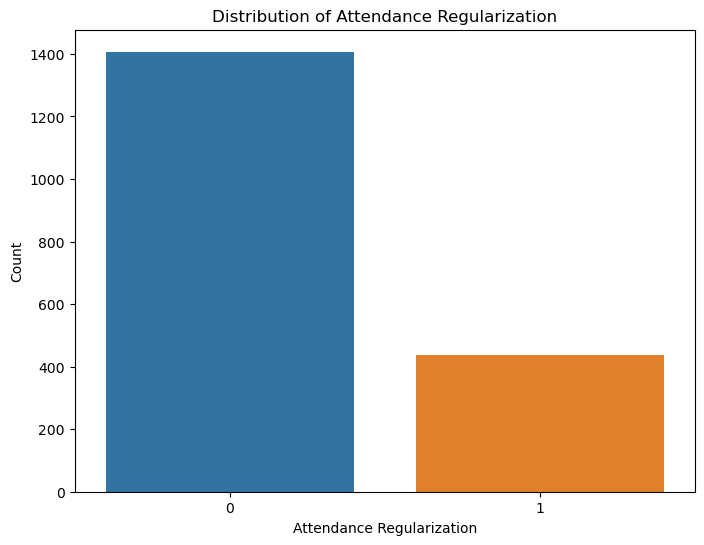

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of attendance_regularization
plt.figure(figsize=(8, 6))
sns.countplot(x='ATTENDANCE_REGULARIZATION', data=df)
plt.title('Distribution of Attendance Regularization')
plt.xlabel('Attendance Regularization')
plt.ylabel('Count')
plt.show()


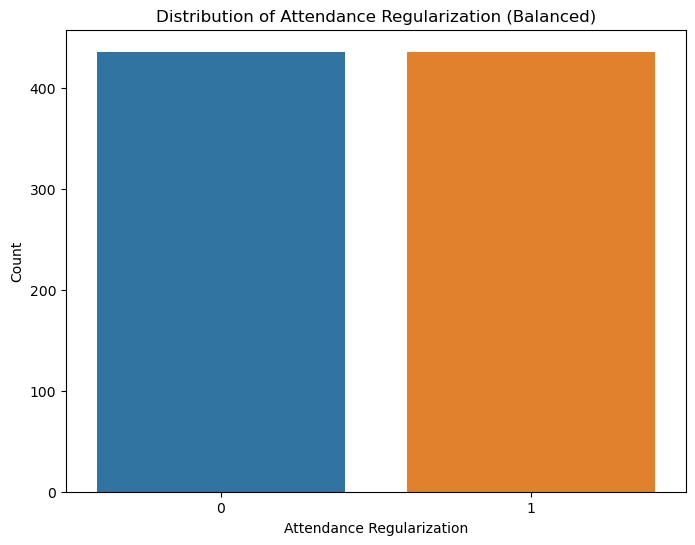

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains your DataFrame with the ATTENDANCE_REGULARIZATION column

# Separate the True and False samples
df_true = df[df['ATTENDANCE_REGULARIZATION'] == True]
df_false = df[df['ATTENDANCE_REGULARIZATION'] == False]

# Downsample the False samples with replacement to match the number of True samples
df_false_downsampled = df_false.sample(n=len(df_true), replace=True, random_state=42)

# Concatenate the downsampled False samples with the True samples
df_balanced = pd.concat([df_true, df_false_downsampled])

# Shuffle the DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Plot the distribution of attendance_regularization after balancing
plt.figure(figsize=(8, 6))
sns.countplot(x='ATTENDANCE_REGULARIZATION', data=df_balanced)
plt.title('Distribution of Attendance Regularization (Balanced)')
plt.xlabel('Attendance Regularization')
plt.ylabel('Count')
plt.show()


In [298]:
df.columns

Index(['ROLE', 'PROJECT_NAME', 'PROJECT_DURATION', 'PROJECT_CATEGORY',
       'ALLOCATION_DURATION', 'ACTIVITY', 'MON', 'TUE', 'WED', 'THUR', 'FRI',
       'SAT', 'SUN', 'TOTAL_WEEK_HOURS', 'HOURS_OVER_OR_UNDER',
       'ATTENDANCE_REGULARIZATION', 'FEEDBACK_SCORE', 'PROJECT_START_DATE_DAY',
       'PROJECT_START_DATE_MONTH', 'PROJECT_START_DATE_YEAR',
       'PROJECT_END_DATE_DAY', 'PROJECT_END_DATE_MONTH',
       'PROJECT_END_DATE_YEAR', 'ALLOCATION_START_DAY',
       'ALLOCATION_START_MONTH', 'ALLOCATION_START_YEAR', 'ALLOCATION_END_DAY',
       'ALLOCATION_END_MONTH', 'ALLOCATION_END_YEAR', 'WEEK_START_DAY',
       'WEEK_START_MONTH', 'WEEK_START_YEAR', 'WEEK_END_DAY', 'WEEK_END_MONTH',
       'WEEK_END_YEAR', 'project_category'],
      dtype='object')

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['ATTENDANCE_REGULARIZATION'])
y = df['ATTENDANCE_REGULARIZATION']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Undersample the majority class to balance the dataset
undersampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X_train, y_train)

# Initialize SVM classifier with adjusted hyperparameters
svm_classifier = SVC(kernel='rbf', C=0.1, gamma='scale')

# Train SVM classifier
svm_classifier.fit(X_balanced, y_balanced)

# Make predictions on test data
svm_predictions = svm_classifier.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_classification_report)



SVM Accuracy: 0.8590785907859079
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       565
           1       0.62      1.00      0.77       173

    accuracy                           0.86       738
   macro avg       0.81      0.91      0.83       738
weighted avg       0.91      0.86      0.87       738



In [300]:
new_data = pd.read_csv("new_data.csv")
# Make predictions on the new data
predictions = svm_classifier.predict(new_data)

# Add the predictions to the DataFrame
new_data['attendance_regularization_prediction'] = predictions

# Display the DataFrame with predictions
print(new_data)


   ROLE  PROJECT_NAME  PROJECT_DURATION  PROJECT_CATEGORY  \
0     2             0                21                 0   
1     2             2                28                 0   

   ALLOCATION_DURATION  ACTIVITY  MON  TUE  WED  THUR  ...  \
0                   42         0    8    3    5    10  ...   
1                   21         2   10    1    8     5  ...   

   ALLOCATION_END_MONTH  ALLOCATION_END_YEAR  WEEK_START_DAY  \
0                     7                 2023            2024   
1                     3                 2024            2023   

   WEEK_START_MONTH  WEEK_START_YEAR  WEEK_END_DAY  WEEK_END_MONTH  \
0                 1               20          2024               1   
1                 7                4          2023               7   

   WEEK_END_YEAR  project_category  attendance_regularization_prediction  
0             27                 0                                     0  
1             11                 0                                     1  
